<a href="https://colab.research.google.com/github/diego6289/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [1]:
## importing the necessary packages

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
### creating the random data function
def get_random_data(w, b, mu, sigma, m):

### c will be used as class label with value 0 and 1 with equal probability
# m= number of data points
  c = np.random.randint(2, size = m)
  n = np.random.normal(mu, sigma, m)
  x_1 = np.random.rand(m) ### first feature randomly generated
  x_2 = w * x_1 + b + (-1)**c * n  ### second feature
  features = np.column_stack([x_1, x_2])
  ### returns the entire data frame
  return (features, c)

In [3]:
m = 5000 ## number of data points

## running the function to create variables and label data
data, labels = get_random_data(5, 5, 1, 1, m)


print("The shape of the the feature space or the variables is: ", data.shape)
print("The shape of the labels column is: ",labels.shape)

The shape of the the feature space or the variables is:  (5000, 2)
The shape of the labels column is:  (5000,)


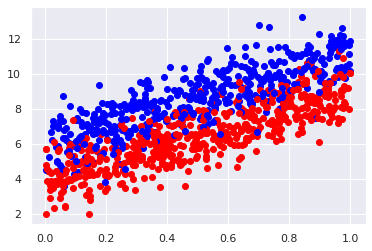

In [4]:
## function to display the generated data
def display_random_data(labels, data, show_graph_boolean):
  display_percentage = (int)(m * 0.2)
  labels_percentage = labels[:display_percentage]
  data_percentage = data[:display_percentage]

  for color_code, datapoint in zip(labels_percentage, data_percentage):
    plt.scatter(datapoint[0], datapoint[1], color = ('red' if color_code == 1 else 'blue'))
  if show_graph_boolean:
    plt.show()

display_random_data(labels, data, 1)

In [0]:
## dividing data into trian and testing with 80/20 rule
training_set = data[:80]
testing_set = data[80:]

training_set_label = labels[:80]
testing_set_label = labels[80:]

# Problem 2

In [0]:
### importing tensorflow package 
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
def keras_model():
  glm_model = tf.keras.models.Sequential()

  ## adding layers and activation function
  glm_model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape = (2, )))

  glm_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.003), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return glm_model

In [8]:
my_keras_model = keras_model()

### setting the number of epochs
epochs_count = 200

history_of_model = my_keras_model.fit(training_set, training_set_label, epochs = epochs_count, batch_size = 512, validation_data = (testing_set, testing_set_label))

Epoch 1/200
1/1 [==============================] - 0s 171ms/step - loss: 5.3979 - accuracy: 0.4875 - val_loss: 5.0073 - val_accuracy: 0.5063
Epoch 2/200
1/1 [==============================] - 0s 37ms/step - loss: 5.3480 - accuracy: 0.4875 - val_loss: 4.9734 - val_accuracy: 0.5063
Epoch 3/200
1/1 [==============================] - 0s 37ms/step - loss: 5.3118 - accuracy: 0.4875 - val_loss: 4.9451 - val_accuracy: 0.5063
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 5.2814 - accuracy: 0.4875 - val_loss: 4.9199 - val_accuracy: 0.5063
Epoch 5/200
1/1 [==============================] - 0s 38ms/step - loss: 5.2545 - accuracy: 0.4875 - val_loss: 4.8968 - val_accuracy: 0.5063
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 5.2298 - accuracy: 0.4875 - val_loss: 4.8752 - val_accuracy: 0.5063
Epoch 7/200
1/1 [==============================] - 0s 40ms/step - loss: 5.2067 - accuracy: 0.4875 - val_loss: 4.8547 - val_accuracy: 0.5063
Epoch 8/200
1/1 [==

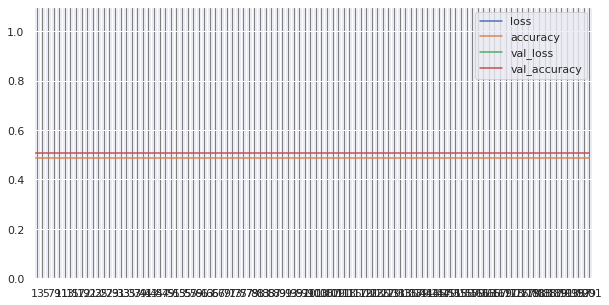

Text(0, 0.5, 'Percentage Value')

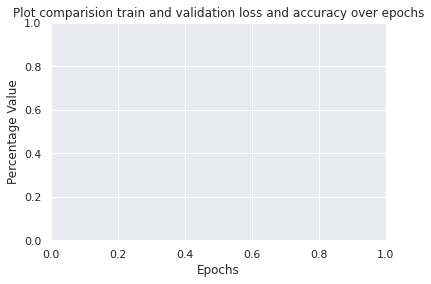

In [9]:
## importing packages

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## creating a datafrrame of the Keras history model created
pd.DataFrame(history_of_model.history).plot(figsize = (10, 5))
plt.grid(True)

### creating the plot of loss accuracy for train and test
plt.gca().set_ylim(0, 1.1)
plt.gca().set_xlim(0, epochs_count)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which = 'minor', color = 'grey', linestyle = '-')

plt.show()
# Add title and axis names
plt.title('Plot comparision train and validation loss and accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Percentage Value')

Text(0, 0.5, 'Y values')

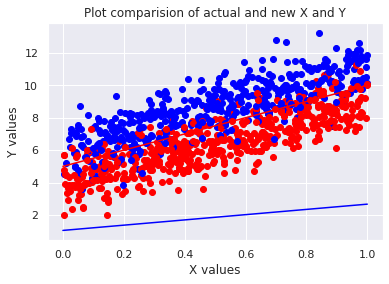

In [10]:
actual_x_val = np.linspace(0.0, 1.0, 100)
actual_y_val = actual_x_val * 5 + 5

## plotting actual x and actual y value
plt.plot(actual_x_val, actual_y_val, color = 'red')

## creating new x value and y value
x_new_val = np.linspace(0.0, 1.0, 100)
weights_values = my_keras_model.layers[0].get_weights()

bias_value = weights_values[1][0]
x_1_weight = weights_values[0][0]
x_2_weight = weights_values[0][1]

#formula for new y value based on x weights and bias term
y_new_val = (-(bias_value / x_2_weight) / (bias_value / x_1_weight)) * x_new_val + (-bias_value / x_2_weight)

## plotting new x and y value
plt.plot(x_new_val, y_new_val, color = 'blue')
display_random_data(labels, data, 0)
plt.plot()

# Add title and axis names
plt.title('Plot comparision of actual and new X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')


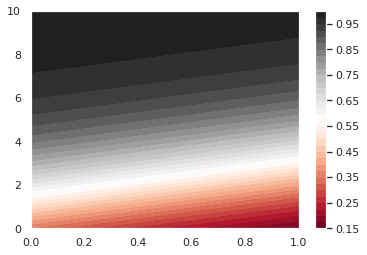

In [11]:
x_lin = np.linspace(0, 1, 500)
y_lin = np.linspace(0, 10, 500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin, y_lin)

z = my_keras_model.predict(np.c_[X.ravel(), Y.ravel()])

z = z.reshape(X.shape)

plt.xlim([0, 1])
plt.ylim([0, 10])

plt.contourf(X, Y, z, 40, cmap = 'RdGy')
plt.colorbar()
plt.show()

# Problem 3

In [0]:
epochs_count = 200
lr = 0.001

In [0]:
def sigmoid_function(z):
  return 1 / (1 + np.exp(-1 * z))

def entropy_func(y, a):
  return -y * np.log10(a) - (1 - y) * np.log10(1 - a)

def loss_computation(A, B):
  partial = m*.80
  loss_val = 0
  for data_val, label in zip(A, B):
    predictor = np.dot(np.reshape(weights_manually_calculated, (2, )), data_val) + bias_term
    bce = entropy_func(label, sigmoid_function(predictor))
    loss_val += bce
  loss_val /= (partial)
  return loss_val

In [14]:
## Stochastic gradient descent
weights_manually_calculated = np.random.rand(2)
bias_term = np.zeros(1)

for epoch in np.arange(epochs_count):
  for i in np.arange(80):
    y_pred = np.dot(weights_manually_calculated, training_set[i]) + bias_term
    inner = sigmoid_function(y_pred) - training_set_label[i]
    gradient_weight_0 = inner * training_set[i][0]
    gradient_weight_1 = inner * training_set[i][1]
    gradient_b = inner

    weights_manually_calculated[0] -= lr * gradient_weight_0
    weights_manually_calculated[1] -= lr * gradient_weight_1
    bias_term -= lr * gradient_b

print("The manual weight is : ",weights_manually_calculated)
print("The manual bias term is: ", bias_term)


The manual weight is :  [ 0.96088381 -0.2466544 ]
The manual bias term is:  [0.98952651]


In [15]:
print("Loss value of testing set: ", loss_computation(testing_set,testing_set_label))

Loss value of testing set:  [0.3230111]


In [16]:
## Compute accuracy
accuracy = 0
partial = m*.80
for data_val, label in zip(testing_set,testing_set_label):
  y_prediction = np.dot(np.reshape(weights_manually_calculated, (2, )), data_val) + bias_term
  label_prediction = 1 if sigmoid_function(y_prediction) > 0.5 else 0
  accuracy += 1 if label_prediction == label else 0

print(accuracy / (m - partial))

3.162


Text(0, 0.5, 'Y values')

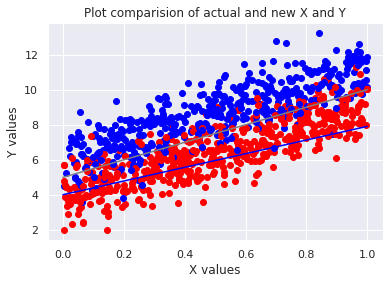

In [17]:
x_actual = np.linspace(0.0, 1.0, 100)
y_actual = x_actual * 5 + 5

plt.plot(x_actual, y_actual, color = 'grey')

x_new = np.linspace(0.0, 1.0, 100)

bias = bias_term[0]
x_1_weight = weights_manually_calculated[0]
x_2_weight = weights_manually_calculated[1]

y_new = (-(bias / x_2_weight) / (bias / x_1_weight)) * x_new + (-bias / x_2_weight)

plt.plot(x_new, y_new, color = 'blue')
display_random_data(labels, data, 0)
plt.plot()

plt.title('Plot comparision of actual and new X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')

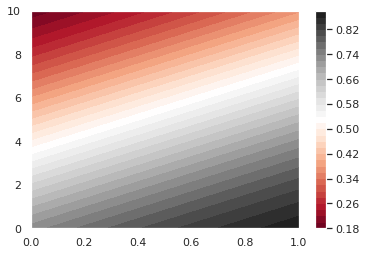

In [18]:
x_linear = np.linspace(0, 1, 500)
y_linear = np.linspace(0, 10, 500)

figure = plt.figure()

X, Y = np.meshgrid(x_linear, y_linear)

z_value = sigmoid_function(X.ravel() * weights_manually_calculated[0] + Y.ravel() * weights_manually_calculated[1] + bias_term[0])
z_value = z_value.reshape(X.shape)

### plotting the gradient
plt.xlim([0, 1]) ## limit for x axis
plt.ylim([0, 10]) ## limit for y axis

plt.contourf(X, Y, z_value, 40, cmap = 'RdGy')
plt.colorbar()
plt.show()